# Notebook n°3: Réidentification faciale (DeepFace)
### Source : Serengil, S. I., & Ozpinar, A. (2020). LightFace: A Hybrid Deep Face Recognition Framework. 2020 Innovations in Intelligent Systems and Applications Conference (ASYU), 23–27. doi:10.1109/ASYU50717.2020.9259802

## 1) Importation des librairies

In [ ]:
################################################################################################################################
# Imports                                                                                                                      #
################################################################################################################################

from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import pandas as pd
import cv2
import numpy as np

from deepface import DeepFace
from deepface.basemodels import VGGFace, Facenet, OpenFace, FbDeepFace

## 2) Chargement du dataset et exploration des données

In [ ]:
################################################################################################################################
# Dataset fetching + keys                                                                                                      #
################################################################################################################################

dataset = fetch_lfw_pairs(subset = 'test', color = True, resize = 1)
dataset.keys()

dict_keys(['data', 'pairs', 'target', 'target_names', 'DESCR'])

In [ ]:
pairs = dataset["pairs"]
targets = dataset["target"]
target_names = dataset["target_names"]

In [ ]:
################################################################################################################################
# Dataset description                                                                                                          #
################################################################################################################################

print(dataset["DESCR"])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

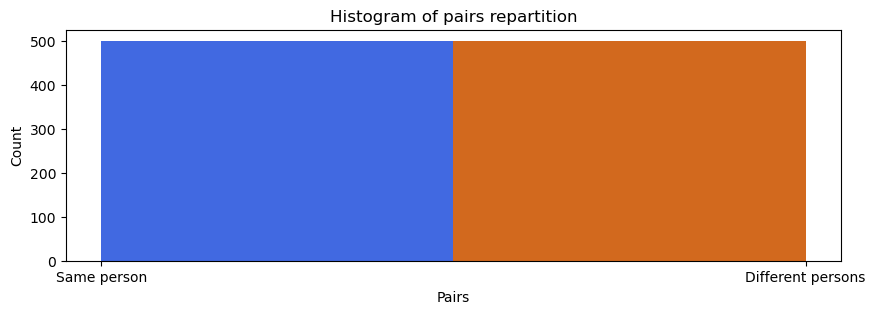

In [ ]:
################################################################################################################################
# Data distribution plotting                                                                                                   #
################################################################################################################################

targets_str = [target_names[i] for i in targets]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 3)

_, _,patches = ax.hist(x=targets_str, bins=len(set(targets_str)), color='royalblue')
patches[0].set_facecolor('royalblue')
patches[1].set_facecolor('chocolate')
ax.set_title('Histogram of pairs repartition')
ax.set_ylabel('Count')
ax.set_xlabel('Pairs')

plt.show()

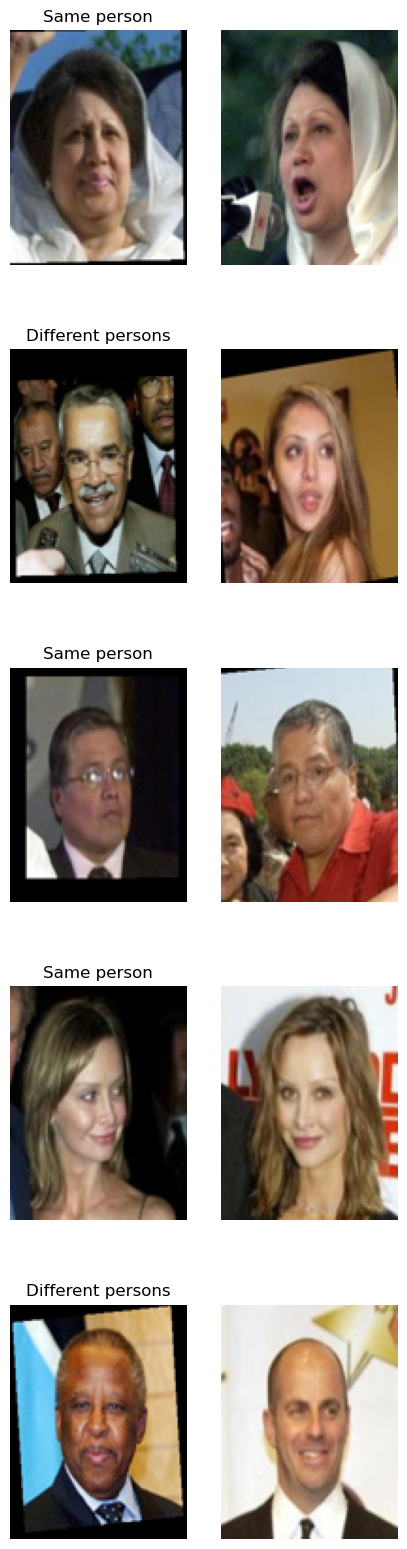

In [ ]:
################################################################################################################################
# Data sample plotting                                                                                                         #
################################################################################################################################

fig, axes = plt.subplots(5, 2)
fig.set_size_inches(5, 20)

for ax in axes.ravel():
    ax.axis("off")
    
for i in range(5):
    
    idx = random.randint(0, 999)
    pair = pairs[idx]
    img1 = pair[0]
    img2 = pair[1]
    
    axes[i, 0].imshow(img1)
    axes[i, 1].imshow(img2)
    
    axes[i, 0].set_title(target_names[targets[idx]])

plt.show()

## 3) Test du modèle

In [ ]:
################################################################################################################################
# Predictions                                                                                                                  #
################################################################################################################################

predictions = []
pbar = tqdm(range(0, len(pairs)))

for i in pbar:
    pair = pairs[i]
    img1 = pair[0]; img2 = pair[1]
    img1 = img1[:,:,::-1]*255; img2 = img2[:,:,::-1]*255 #opencv expects bgr instead of rgb
    
    result = DeepFace.verify(img1, img2, model=vgg_model, model_name='VGG-Face', enforce_detection=False)
    
    if result["verified"] == True:
        predictions.append(1)
    else:
        predictions.append(0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 165ms/step


  0%|          | 1/1000 [00:00<06:39,  2.50it/s]

1/1 [==============================] - 0s 149ms/step


  0%|          | 2/1000 [00:00<06:35,  2.52it/s]

1/1 [==============================] - 0s 204ms/step


  0%|          | 3/1000 [00:01<06:57,  2.39it/s]

1/1 [==============================] - 0s 141ms/step


  0%|          | 4/1000 [00:01<06:47,  2.44it/s]

1/1 [==============================] - 0s 142ms/step


  0%|          | 5/1000 [00:01<06:29,  2.55it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 6/1000 [00:02<06:19,  2.62it/s]

1/1 [==============================] - 0s 145ms/step


  1%|          | 7/1000 [00:02<06:10,  2.68it/s]

1/1 [==============================] - 0s 154ms/step


  1%|          | 8/1000 [00:03<06:09,  2.68it/s]

1/1 [==============================] - 0s 150ms/step


  1%|          | 9/1000 [00:03<06:06,  2.70it/s]

1/1 [==============================] - 0s 144ms/step


  1%|          | 10/1000 [00:03<06:05,  2.71it/s]

1/1 [==============================] - 0s 148ms/step


  1%|          | 11/1000 [00:04<06:10,  2.67it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 12/1000 [00:04<06:03,  2.72it/s]

1/1 [==============================] - 0s 161ms/step


  1%|▏         | 13/1000 [00:04<06:07,  2.69it/s]

1/1 [==============================] - 0s 201ms/step


  1%|▏         | 14/1000 [00:05<06:26,  2.55it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 15/1000 [00:05<06:29,  2.53it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 16/1000 [00:06<06:19,  2.59it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 17/1000 [00:06<06:10,  2.65it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 18/1000 [00:06<06:06,  2.68it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 19/1000 [00:07<06:02,  2.71it/s]

1/1 [==============================] - 0s 146ms/step


  2%|▏         | 20/1000 [00:07<05:58,  2.73it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 21/1000 [00:08<06:16,  2.60it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 22/1000 [00:08<06:32,  2.49it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 23/1000 [00:08<06:50,  2.38it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 24/1000 [00:09<06:35,  2.47it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▎         | 25/1000 [00:09<06:25,  2.53it/s]

1/1 [==============================] - 0s 144ms/step


  3%|▎         | 26/1000 [00:10<06:17,  2.58it/s]

1/1 [==============================] - 0s 183ms/step


  3%|▎         | 27/1000 [00:10<06:19,  2.56it/s]

1/1 [==============================] - 0s 153ms/step


  3%|▎         | 28/1000 [00:10<06:14,  2.59it/s]

1/1 [==============================] - 0s 167ms/step


  3%|▎         | 29/1000 [00:11<06:22,  2.54it/s]

1/1 [==============================] - 0s 164ms/step


  3%|▎         | 30/1000 [00:11<06:27,  2.50it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 31/1000 [00:11<06:17,  2.56it/s]

1/1 [==============================] - 0s 166ms/step


  3%|▎         | 32/1000 [00:12<06:17,  2.57it/s]

1/1 [==============================] - 0s 189ms/step


  3%|▎         | 33/1000 [00:12<06:29,  2.48it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 34/1000 [00:13<06:24,  2.51it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▎         | 35/1000 [00:13<06:19,  2.54it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▎         | 36/1000 [00:13<06:23,  2.51it/s]

1/1 [==============================] - 0s 156ms/step


  4%|▎         | 37/1000 [00:14<06:15,  2.57it/s]

1/1 [==============================] - 0s 162ms/step


  4%|▍         | 38/1000 [00:14<06:25,  2.50it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 39/1000 [00:15<06:16,  2.55it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 40/1000 [00:15<06:10,  2.59it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 41/1000 [00:15<06:03,  2.64it/s]

1/1 [==============================] - 0s 156ms/step


  4%|▍         | 42/1000 [00:16<06:06,  2.62it/s]

1/1 [==============================] - 0s 168ms/step


  4%|▍         | 43/1000 [00:16<06:13,  2.56it/s]

1/1 [==============================] - 0s 149ms/step


  4%|▍         | 44/1000 [00:17<06:07,  2.60it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 45/1000 [00:17<06:03,  2.63it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▍         | 46/1000 [00:17<06:06,  2.61it/s]

1/1 [==============================] - 0s 158ms/step


  5%|▍         | 47/1000 [00:18<06:15,  2.54it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▍         | 48/1000 [00:18<06:09,  2.58it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▍         | 49/1000 [00:18<06:06,  2.60it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 50/1000 [00:19<06:16,  2.52it/s]

1/1 [==============================] - 0s 182ms/step


  5%|▌         | 51/1000 [00:19<06:19,  2.50it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▌         | 52/1000 [00:20<06:32,  2.41it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 53/1000 [00:20<06:30,  2.43it/s]

1/1 [==============================] - 0s 142ms/step


  5%|▌         | 54/1000 [00:21<06:18,  2.50it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▌         | 55/1000 [00:21<06:10,  2.55it/s]

1/1 [==============================] - 0s 144ms/step


  6%|▌         | 56/1000 [00:21<06:05,  2.58it/s]

1/1 [==============================] - 0s 159ms/step


  6%|▌         | 57/1000 [00:22<06:03,  2.59it/s]

1/1 [==============================] - 0s 145ms/step


  6%|▌         | 58/1000 [00:22<05:54,  2.65it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▌         | 59/1000 [00:22<06:10,  2.54it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▌         | 60/1000 [00:23<06:06,  2.56it/s]

1/1 [==============================] - 0s 143ms/step


  6%|▌         | 61/1000 [00:23<06:00,  2.61it/s]

1/1 [==============================] - 0s 144ms/step


  6%|▌         | 62/1000 [00:24<05:53,  2.65it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▋         | 63/1000 [00:24<05:48,  2.69it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▋         | 64/1000 [00:24<05:45,  2.71it/s]

1/1 [==============================] - 0s 145ms/step


  6%|▋         | 65/1000 [00:25<05:42,  2.73it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 66/1000 [00:25<05:43,  2.72it/s]

1/1 [==============================] - 0s 145ms/step


  7%|▋         | 67/1000 [00:25<05:41,  2.74it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 68/1000 [00:26<05:38,  2.75it/s]

1/1 [==============================] - 0s 145ms/step


  7%|▋         | 69/1000 [00:26<05:37,  2.76it/s]

1/1 [==============================] - 0s 144ms/step


  7%|▋         | 70/1000 [00:26<05:37,  2.76it/s]

1/1 [==============================] - 0s 151ms/step


  7%|▋         | 71/1000 [00:27<05:38,  2.74it/s]

1/1 [==============================] - 0s 146ms/step


  7%|▋         | 72/1000 [00:27<05:44,  2.69it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 73/1000 [00:28<05:41,  2.72it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 74/1000 [00:28<05:39,  2.73it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 75/1000 [00:28<05:37,  2.74it/s]

1/1 [==============================] - 0s 145ms/step


  8%|▊         | 76/1000 [00:29<05:37,  2.73it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 77/1000 [00:29<05:38,  2.72it/s]

1/1 [==============================] - 0s 145ms/step


  8%|▊         | 78/1000 [00:29<05:38,  2.73it/s]

1/1 [==============================] - 0s 149ms/step


  8%|▊         | 79/1000 [00:30<05:38,  2.72it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 80/1000 [00:30<05:39,  2.71it/s]

1/1 [==============================] - 0s 161ms/step


  8%|▊         | 81/1000 [00:31<05:46,  2.65it/s]

1/1 [==============================] - 0s 142ms/step


  8%|▊         | 82/1000 [00:31<05:42,  2.68it/s]

1/1 [==============================] - 0s 141ms/step


  8%|▊         | 83/1000 [00:31<05:38,  2.71it/s]

1/1 [==============================] - 0s 142ms/step


  8%|▊         | 84/1000 [00:32<05:36,  2.72it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 85/1000 [00:32<05:36,  2.72it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▊         | 86/1000 [00:32<05:34,  2.73it/s]

1/1 [==============================] - 0s 142ms/step


  9%|▊         | 87/1000 [00:33<05:31,  2.75it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 88/1000 [00:33<05:29,  2.77it/s]

1/1 [==============================] - 0s 144ms/step


  9%|▉         | 89/1000 [00:33<05:27,  2.78it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 90/1000 [00:34<05:29,  2.76it/s]

1/1 [==============================] - 0s 161ms/step


  9%|▉         | 91/1000 [00:34<05:36,  2.70it/s]

1/1 [==============================] - 0s 165ms/step


  9%|▉         | 92/1000 [00:35<05:59,  2.53it/s]

1/1 [==============================] - 0s 142ms/step


  9%|▉         | 93/1000 [00:35<05:48,  2.60it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 94/1000 [00:35<05:50,  2.58it/s]

1/1 [==============================] - 0s 154ms/step


 10%|▉         | 95/1000 [00:36<05:47,  2.60it/s]

1/1 [==============================] - 0s 144ms/step


 10%|▉         | 96/1000 [00:36<05:40,  2.65it/s]

1/1 [==============================] - 0s 150ms/step


 10%|▉         | 97/1000 [00:37<05:40,  2.65it/s]

1/1 [==============================] - 0s 157ms/step


 10%|▉         | 98/1000 [00:37<05:40,  2.65it/s]

1/1 [==============================] - 0s 163ms/step


 10%|▉         | 99/1000 [00:37<05:46,  2.60it/s]

1/1 [==============================] - 0s 151ms/step


 10%|█         | 100/1000 [00:38<05:41,  2.63it/s]

1/1 [==============================] - 0s 146ms/step


 10%|█         | 101/1000 [00:38<05:37,  2.67it/s]

1/1 [==============================] - 0s 148ms/step


 10%|█         | 102/1000 [00:38<05:33,  2.70it/s]

1/1 [==============================] - 0s 146ms/step


 10%|█         | 103/1000 [00:39<05:29,  2.72it/s]

1/1 [==============================] - 0s 148ms/step


 10%|█         | 104/1000 [00:39<05:28,  2.73it/s]

1/1 [==============================] - 0s 149ms/step


 10%|█         | 105/1000 [00:40<05:29,  2.71it/s]

1/1 [==============================] - 0s 150ms/step


 11%|█         | 106/1000 [00:40<05:28,  2.72it/s]

1/1 [==============================] - 0s 151ms/step


 11%|█         | 107/1000 [00:40<05:28,  2.72it/s]

1/1 [==============================] - 0s 145ms/step


 11%|█         | 108/1000 [00:41<05:27,  2.73it/s]

1/1 [==============================] - 0s 142ms/step


 11%|█         | 109/1000 [00:41<05:25,  2.74it/s]

1/1 [==============================] - 0s 145ms/step


 11%|█         | 110/1000 [00:41<05:25,  2.73it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█         | 111/1000 [00:42<05:23,  2.75it/s]

1/1 [==============================] - 0s 149ms/step


 11%|█         | 112/1000 [00:42<05:25,  2.73it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█▏        | 113/1000 [00:42<05:25,  2.72it/s]

1/1 [==============================] - 0s 150ms/step


 11%|█▏        | 114/1000 [00:43<05:25,  2.72it/s]

1/1 [==============================] - 0s 149ms/step


 12%|█▏        | 115/1000 [00:43<05:24,  2.73it/s]

1/1 [==============================] - 0s 153ms/step


 12%|█▏        | 116/1000 [00:44<05:23,  2.73it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 117/1000 [00:44<05:21,  2.75it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 118/1000 [00:44<05:19,  2.76it/s]

1/1 [==============================] - 0s 148ms/step


 12%|█▏        | 119/1000 [00:45<05:21,  2.74it/s]

1/1 [==============================] - 0s 159ms/step


 12%|█▏        | 120/1000 [00:45<05:27,  2.68it/s]

1/1 [==============================] - 0s 155ms/step


 12%|█▏        | 121/1000 [00:45<05:29,  2.67it/s]

1/1 [==============================] - 0s 153ms/step


 12%|█▏        | 122/1000 [00:46<05:30,  2.66it/s]

1/1 [==============================] - 0s 155ms/step


 12%|█▏        | 123/1000 [00:46<05:33,  2.63it/s]

1/1 [==============================] - 0s 157ms/step


 12%|█▏        | 124/1000 [00:47<05:37,  2.60it/s]

1/1 [==============================] - 0s 142ms/step


 12%|█▎        | 125/1000 [00:47<05:30,  2.65it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 126/1000 [00:47<05:27,  2.67it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 127/1000 [00:48<05:28,  2.66it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 128/1000 [00:48<05:25,  2.68it/s]

1/1 [==============================] - 0s 149ms/step


 13%|█▎        | 129/1000 [00:48<05:25,  2.68it/s]

1/1 [==============================] - 0s 145ms/step


 13%|█▎        | 130/1000 [00:49<05:20,  2.72it/s]

1/1 [==============================] - 0s 147ms/step


 13%|█▎        | 131/1000 [00:49<05:19,  2.72it/s]

1/1 [==============================] - 0s 145ms/step


 13%|█▎        | 132/1000 [00:49<05:16,  2.74it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 133/1000 [00:50<05:15,  2.75it/s]

1/1 [==============================] - 0s 149ms/step


 13%|█▎        | 134/1000 [00:50<05:16,  2.74it/s]

1/1 [==============================] - 0s 149ms/step


 14%|█▎        | 135/1000 [00:51<05:15,  2.75it/s]

1/1 [==============================] - 0s 152ms/step


 14%|█▎        | 136/1000 [00:51<05:15,  2.74it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▎        | 137/1000 [00:51<05:14,  2.75it/s]

1/1 [==============================] - 0s 148ms/step


 14%|█▍        | 138/1000 [00:52<05:13,  2.75it/s]

1/1 [==============================] - 0s 151ms/step


 14%|█▍        | 139/1000 [00:52<05:14,  2.74it/s]

1/1 [==============================] - 0s 153ms/step


 14%|█▍        | 140/1000 [00:52<05:14,  2.73it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 141/1000 [00:53<05:14,  2.73it/s]

1/1 [==============================] - 0s 154ms/step


 14%|█▍        | 142/1000 [00:53<05:15,  2.72it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 143/1000 [00:54<05:16,  2.71it/s]

1/1 [==============================] - 0s 151ms/step


 14%|█▍        | 144/1000 [00:54<05:15,  2.71it/s]

1/1 [==============================] - 0s 149ms/step


 14%|█▍        | 145/1000 [00:54<05:14,  2.72it/s]

1/1 [==============================] - 0s 148ms/step


 15%|█▍        | 146/1000 [00:55<05:13,  2.73it/s]

1/1 [==============================] - 0s 152ms/step


 15%|█▍        | 147/1000 [00:55<05:12,  2.73it/s]

1/1 [==============================] - 0s 151ms/step


 15%|█▍        | 148/1000 [00:55<05:13,  2.72it/s]

1/1 [==============================] - 0s 152ms/step


 15%|█▍        | 149/1000 [00:56<05:12,  2.72it/s]

1/1 [==============================] - 0s 148ms/step


 15%|█▌        | 150/1000 [00:56<05:14,  2.70it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▌        | 151/1000 [00:56<05:14,  2.70it/s]

1/1 [==============================] - 0s 151ms/step


 15%|█▌        | 152/1000 [00:57<05:14,  2.69it/s]

1/1 [==============================] - 0s 155ms/step


 15%|█▌        | 153/1000 [00:57<05:18,  2.66it/s]

1/1 [==============================] - 0s 149ms/step


 15%|█▌        | 154/1000 [00:58<05:16,  2.67it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▌        | 155/1000 [00:58<05:16,  2.67it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▌        | 156/1000 [00:58<05:15,  2.68it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 157/1000 [00:59<05:13,  2.69it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 158/1000 [00:59<05:12,  2.69it/s]

1/1 [==============================] - 0s 143ms/step


 16%|█▌        | 159/1000 [00:59<05:11,  2.70it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 160/1000 [01:00<05:11,  2.70it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 161/1000 [01:00<05:10,  2.70it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 162/1000 [01:01<05:09,  2.71it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▋        | 163/1000 [01:01<05:12,  2.68it/s]

1/1 [==============================] - 0s 153ms/step


 16%|█▋        | 164/1000 [01:01<05:12,  2.67it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▋        | 165/1000 [01:02<05:10,  2.69it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 166/1000 [01:02<05:10,  2.69it/s]

1/1 [==============================] - 0s 154ms/step


 17%|█▋        | 167/1000 [01:02<05:14,  2.65it/s]

1/1 [==============================] - 0s 152ms/step


 17%|█▋        | 168/1000 [01:03<05:11,  2.67it/s]

1/1 [==============================] - 0s 150ms/step


 17%|█▋        | 169/1000 [01:03<05:09,  2.69it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 170/1000 [01:04<05:07,  2.70it/s]

1/1 [==============================] - 0s 163ms/step


 17%|█▋        | 171/1000 [01:04<05:08,  2.69it/s]

1/1 [==============================] - 0s 152ms/step


 17%|█▋        | 172/1000 [01:04<05:09,  2.68it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 173/1000 [01:05<05:06,  2.70it/s]

1/1 [==============================] - 0s 155ms/step


 17%|█▋        | 174/1000 [01:05<05:06,  2.70it/s]

1/1 [==============================] - 0s 152ms/step


 18%|█▊        | 175/1000 [01:05<05:04,  2.71it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 176/1000 [01:06<05:04,  2.71it/s]

1/1 [==============================] - 0s 153ms/step


 18%|█▊        | 177/1000 [01:06<05:05,  2.70it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 178/1000 [01:06<05:02,  2.71it/s]

1/1 [==============================] - 0s 156ms/step


 18%|█▊        | 179/1000 [01:07<05:03,  2.70it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█▊        | 180/1000 [01:07<05:12,  2.63it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 181/1000 [01:08<05:06,  2.67it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 182/1000 [01:08<05:06,  2.67it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 183/1000 [01:08<05:05,  2.68it/s]

1/1 [==============================] - 0s 148ms/step


 18%|█▊        | 184/1000 [01:09<05:02,  2.69it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 185/1000 [01:09<05:00,  2.71it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▊        | 186/1000 [01:09<04:59,  2.72it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▊        | 187/1000 [01:10<05:00,  2.71it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 188/1000 [01:10<04:59,  2.71it/s]

1/1 [==============================] - 0s 153ms/step


 19%|█▉        | 189/1000 [01:11<04:59,  2.71it/s]

1/1 [==============================] - 0s 157ms/step


 19%|█▉        | 190/1000 [01:11<05:01,  2.69it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▉        | 191/1000 [01:11<05:01,  2.69it/s]

1/1 [==============================] - 0s 158ms/step


 19%|█▉        | 192/1000 [01:12<05:03,  2.67it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 193/1000 [01:12<05:00,  2.68it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 194/1000 [01:12<04:58,  2.70it/s]

1/1 [==============================] - 0s 150ms/step


 20%|█▉        | 195/1000 [01:13<04:57,  2.71it/s]

1/1 [==============================] - 0s 153ms/step


 20%|█▉        | 196/1000 [01:13<04:58,  2.70it/s]

1/1 [==============================] - 0s 151ms/step


 20%|█▉        | 197/1000 [01:14<04:57,  2.70it/s]

1/1 [==============================] - 0s 151ms/step


 20%|█▉        | 198/1000 [01:14<04:55,  2.71it/s]

1/1 [==============================] - 0s 152ms/step


 20%|█▉        | 199/1000 [01:14<04:55,  2.71it/s]

1/1 [==============================] - 0s 152ms/step


 20%|██        | 200/1000 [01:15<04:55,  2.71it/s]

1/1 [==============================] - 0s 150ms/step


 20%|██        | 201/1000 [01:15<04:56,  2.69it/s]

1/1 [==============================] - 0s 150ms/step


 20%|██        | 202/1000 [01:15<04:55,  2.70it/s]

1/1 [==============================] - 0s 152ms/step


 20%|██        | 203/1000 [01:16<04:53,  2.71it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 204/1000 [01:16<04:51,  2.73it/s]

1/1 [==============================] - 0s 153ms/step


 20%|██        | 205/1000 [01:17<04:51,  2.73it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 206/1000 [01:17<05:02,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 207/1000 [01:17<05:25,  2.44it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 208/1000 [01:18<05:36,  2.35it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██        | 209/1000 [01:18<05:47,  2.28it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 210/1000 [01:19<06:02,  2.18it/s]

1/1 [==============================] - 0s 182ms/step


 21%|██        | 211/1000 [01:19<06:00,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 212/1000 [01:20<05:57,  2.21it/s]

1/1 [==============================] - 0s 192ms/step


 21%|██▏       | 213/1000 [01:20<06:00,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██▏       | 214/1000 [01:21<05:55,  2.21it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 215/1000 [01:21<05:57,  2.20it/s]

1/1 [==============================] - 0s 196ms/step


 22%|██▏       | 216/1000 [01:22<06:00,  2.18it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 217/1000 [01:22<05:47,  2.26it/s]

1/1 [==============================] - 0s 157ms/step


 22%|██▏       | 218/1000 [01:22<05:38,  2.31it/s]

1/1 [==============================] - 0s 148ms/step


 22%|██▏       | 219/1000 [01:23<05:23,  2.42it/s]

1/1 [==============================] - 0s 162ms/step


 22%|██▏       | 220/1000 [01:23<05:23,  2.41it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 221/1000 [01:24<05:11,  2.50it/s]

1/1 [==============================] - 0s 146ms/step


 22%|██▏       | 222/1000 [01:24<05:04,  2.56it/s]

1/1 [==============================] - 0s 151ms/step


 22%|██▏       | 223/1000 [01:24<05:00,  2.59it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 224/1000 [01:25<05:01,  2.58it/s]

1/1 [==============================] - 0s 154ms/step


 22%|██▎       | 225/1000 [01:25<05:08,  2.51it/s]

1/1 [==============================] - 0s 159ms/step


 23%|██▎       | 226/1000 [01:25<05:02,  2.56it/s]

1/1 [==============================] - 0s 195ms/step


 23%|██▎       | 227/1000 [01:26<05:16,  2.44it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 228/1000 [01:26<05:22,  2.39it/s]

1/1 [==============================] - 0s 157ms/step


 23%|██▎       | 229/1000 [01:27<05:23,  2.38it/s]

1/1 [==============================] - 0s 144ms/step


 23%|██▎       | 230/1000 [01:27<05:21,  2.40it/s]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 231/1000 [01:28<05:24,  2.37it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 232/1000 [01:28<05:11,  2.47it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 233/1000 [01:28<05:02,  2.54it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 234/1000 [01:29<04:54,  2.60it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▎       | 235/1000 [01:29<04:51,  2.62it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▎       | 236/1000 [01:29<04:48,  2.65it/s]

1/1 [==============================] - 0s 146ms/step


 24%|██▎       | 237/1000 [01:30<04:46,  2.67it/s]

1/1 [==============================] - 0s 151ms/step


 24%|██▍       | 238/1000 [01:30<04:44,  2.68it/s]

1/1 [==============================] - 0s 148ms/step


 24%|██▍       | 239/1000 [01:31<04:42,  2.70it/s]

1/1 [==============================] - 0s 154ms/step


 24%|██▍       | 240/1000 [01:31<04:43,  2.68it/s]

1/1 [==============================] - 0s 147ms/step


 24%|██▍       | 241/1000 [01:31<04:41,  2.70it/s]

1/1 [==============================] - 0s 144ms/step


 24%|██▍       | 242/1000 [01:32<04:38,  2.72it/s]

1/1 [==============================] - 0s 146ms/step


 24%|██▍       | 243/1000 [01:32<04:38,  2.72it/s]

1/1 [==============================] - 0s 144ms/step


 24%|██▍       | 244/1000 [01:32<04:38,  2.72it/s]

1/1 [==============================] - 0s 144ms/step


 24%|██▍       | 245/1000 [01:33<04:40,  2.69it/s]

1/1 [==============================] - 0s 148ms/step


 25%|██▍       | 246/1000 [01:33<04:40,  2.68it/s]

1/1 [==============================] - 0s 144ms/step


 25%|██▍       | 247/1000 [01:34<04:42,  2.67it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▍       | 248/1000 [01:34<04:40,  2.68it/s]

1/1 [==============================] - 0s 153ms/step


 25%|██▍       | 249/1000 [01:34<04:43,  2.65it/s]

1/1 [==============================] - 0s 152ms/step


 25%|██▌       | 250/1000 [01:35<04:43,  2.65it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▌       | 251/1000 [01:35<04:44,  2.64it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▌       | 252/1000 [01:35<04:47,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▌       | 253/1000 [01:36<05:03,  2.46it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 254/1000 [01:36<05:13,  2.38it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 255/1000 [01:37<05:23,  2.30it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 256/1000 [01:37<05:32,  2.24it/s]

1/1 [==============================] - 0s 213ms/step


 26%|██▌       | 257/1000 [01:38<05:41,  2.18it/s]

1/1 [==============================] - 0s 215ms/step


 26%|██▌       | 258/1000 [01:38<05:53,  2.10it/s]

1/1 [==============================] - 0s 261ms/step


 26%|██▌       | 259/1000 [01:39<06:11,  2.00it/s]

1/1 [==============================] - 0s 189ms/step


 26%|██▌       | 260/1000 [01:39<06:07,  2.01it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 261/1000 [01:40<06:00,  2.05it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 262/1000 [01:40<05:57,  2.06it/s]

1/1 [==============================] - 0s 231ms/step


 26%|██▋       | 263/1000 [01:41<06:01,  2.04it/s]

1/1 [==============================] - 0s 236ms/step


 26%|██▋       | 264/1000 [01:41<06:11,  1.98it/s]

1/1 [==============================] - 0s 187ms/step


 26%|██▋       | 265/1000 [01:42<06:00,  2.04it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 266/1000 [01:42<05:54,  2.07it/s]

1/1 [==============================] - 0s 228ms/step


 27%|██▋       | 267/1000 [01:43<06:03,  2.02it/s]

1/1 [==============================] - 0s 188ms/step


 27%|██▋       | 268/1000 [01:43<05:58,  2.04it/s]

1/1 [==============================] - 0s 206ms/step


 27%|██▋       | 269/1000 [01:44<06:04,  2.01it/s]

1/1 [==============================] - 0s 187ms/step


 27%|██▋       | 270/1000 [01:44<05:56,  2.05it/s]

1/1 [==============================] - 0s 196ms/step


 27%|██▋       | 271/1000 [01:45<05:54,  2.06it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 272/1000 [01:45<05:41,  2.13it/s]

1/1 [==============================] - 0s 177ms/step


 27%|██▋       | 273/1000 [01:46<05:32,  2.19it/s]

1/1 [==============================] - 0s 228ms/step


 27%|██▋       | 274/1000 [01:46<05:45,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 275/1000 [01:47<05:36,  2.16it/s]

1/1 [==============================] - 0s 187ms/step


 28%|██▊       | 276/1000 [01:47<05:38,  2.14it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 277/1000 [01:47<05:38,  2.13it/s]

1/1 [==============================] - 0s 190ms/step


 28%|██▊       | 278/1000 [01:48<05:46,  2.09it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 279/1000 [01:48<05:39,  2.12it/s]

1/1 [==============================] - 0s 191ms/step


 28%|██▊       | 280/1000 [01:49<05:32,  2.17it/s]

1/1 [==============================] - 0s 188ms/step


 28%|██▊       | 281/1000 [01:49<05:31,  2.17it/s]

1/1 [==============================] - 0s 191ms/step


 28%|██▊       | 282/1000 [01:50<05:28,  2.19it/s]

1/1 [==============================] - 0s 192ms/step


 28%|██▊       | 283/1000 [01:50<05:28,  2.19it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 284/1000 [01:51<05:21,  2.22it/s]

1/1 [==============================] - 0s 190ms/step


 28%|██▊       | 285/1000 [01:51<05:22,  2.22it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▊       | 286/1000 [01:52<05:18,  2.24it/s]

1/1 [==============================] - 0s 189ms/step


 29%|██▊       | 287/1000 [01:52<05:14,  2.26it/s]

1/1 [==============================] - 0s 197ms/step


 29%|██▉       | 288/1000 [01:52<05:15,  2.25it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 289/1000 [01:53<05:13,  2.27it/s]

1/1 [==============================] - 0s 194ms/step


 29%|██▉       | 290/1000 [01:53<05:13,  2.27it/s]

1/1 [==============================] - 0s 186ms/step


 29%|██▉       | 291/1000 [01:54<05:11,  2.28it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██▉       | 292/1000 [01:54<05:10,  2.28it/s]

1/1 [==============================] - 0s 185ms/step


 29%|██▉       | 293/1000 [01:55<05:09,  2.28it/s]

1/1 [==============================] - 0s 192ms/step


 29%|██▉       | 294/1000 [01:55<05:09,  2.28it/s]

1/1 [==============================] - 0s 189ms/step


 30%|██▉       | 295/1000 [01:56<05:07,  2.29it/s]

1/1 [==============================] - 0s 208ms/step


 30%|██▉       | 296/1000 [01:56<05:12,  2.25it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 297/1000 [01:56<05:07,  2.28it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 298/1000 [01:57<05:08,  2.28it/s]

1/1 [==============================] - 0s 178ms/step


 30%|██▉       | 299/1000 [01:57<05:06,  2.29it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███       | 300/1000 [01:58<05:06,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 301/1000 [01:58<05:04,  2.29it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 302/1000 [01:59<05:04,  2.29it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 303/1000 [01:59<05:06,  2.27it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 304/1000 [01:59<05:05,  2.28it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 305/1000 [02:00<05:02,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 306/1000 [02:00<05:03,  2.29it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 307/1000 [02:01<05:02,  2.29it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 308/1000 [02:01<05:01,  2.30it/s]

1/1 [==============================] - 0s 186ms/step


 31%|███       | 309/1000 [02:02<05:01,  2.29it/s]

1/1 [==============================] - 0s 192ms/step


 31%|███       | 310/1000 [02:02<05:04,  2.27it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 311/1000 [02:03<05:11,  2.21it/s]

1/1 [==============================] - 0s 236ms/step


 31%|███       | 312/1000 [02:03<05:31,  2.07it/s]

1/1 [==============================] - 0s 200ms/step


 31%|███▏      | 313/1000 [02:04<05:32,  2.06it/s]

1/1 [==============================] - 0s 195ms/step


 31%|███▏      | 314/1000 [02:04<05:27,  2.10it/s]

1/1 [==============================] - 0s 226ms/step


 32%|███▏      | 315/1000 [02:05<05:32,  2.06it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 316/1000 [02:05<05:37,  2.02it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 317/1000 [02:06<05:34,  2.04it/s]

1/1 [==============================] - 0s 198ms/step


 32%|███▏      | 318/1000 [02:06<05:29,  2.07it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 319/1000 [02:07<05:26,  2.09it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 320/1000 [02:07<05:31,  2.05it/s]

1/1 [==============================] - 0s 188ms/step


 32%|███▏      | 321/1000 [02:08<05:30,  2.06it/s]

1/1 [==============================] - 0s 230ms/step


 32%|███▏      | 322/1000 [02:08<05:35,  2.02it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 323/1000 [02:09<05:37,  2.01it/s]

1/1 [==============================] - 0s 214ms/step


 32%|███▏      | 324/1000 [02:09<05:36,  2.01it/s]

1/1 [==============================] - 0s 189ms/step


 32%|███▎      | 325/1000 [02:10<05:34,  2.02it/s]

1/1 [==============================] - 0s 255ms/step


 33%|███▎      | 326/1000 [02:10<05:44,  1.96it/s]

1/1 [==============================] - 0s 195ms/step


 33%|███▎      | 327/1000 [02:11<05:37,  2.00it/s]

1/1 [==============================] - 0s 184ms/step


 33%|███▎      | 328/1000 [02:11<05:30,  2.03it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 329/1000 [02:11<05:20,  2.10it/s]

1/1 [==============================] - 0s 198ms/step


 33%|███▎      | 330/1000 [02:12<05:13,  2.13it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 331/1000 [02:12<05:15,  2.12it/s]

1/1 [==============================] - 0s 213ms/step


 33%|███▎      | 332/1000 [02:13<05:26,  2.05it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 333/1000 [02:13<05:34,  1.99it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 334/1000 [02:14<05:24,  2.05it/s]

1/1 [==============================] - 0s 186ms/step


 34%|███▎      | 335/1000 [02:14<05:14,  2.11it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▎      | 336/1000 [02:15<05:09,  2.15it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▎      | 337/1000 [02:15<05:06,  2.16it/s]

1/1 [==============================] - 0s 192ms/step


 34%|███▍      | 338/1000 [02:16<05:04,  2.18it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▍      | 339/1000 [02:16<04:59,  2.21it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 340/1000 [02:17<05:14,  2.10it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 341/1000 [02:17<05:12,  2.11it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 342/1000 [02:18<05:06,  2.14it/s]

1/1 [==============================] - 0s 187ms/step


 34%|███▍      | 343/1000 [02:18<05:06,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███▍      | 344/1000 [02:18<05:04,  2.16it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 345/1000 [02:19<05:01,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███▍      | 346/1000 [02:19<04:59,  2.18it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███▍      | 347/1000 [02:20<04:59,  2.18it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▍      | 348/1000 [02:20<04:56,  2.20it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▍      | 349/1000 [02:21<04:56,  2.20it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 350/1000 [02:21<04:57,  2.18it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▌      | 351/1000 [02:22<04:59,  2.17it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▌      | 352/1000 [02:22<04:59,  2.16it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 353/1000 [02:23<05:07,  2.10it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▌      | 354/1000 [02:23<05:13,  2.06it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 355/1000 [02:24<05:06,  2.11it/s]

1/1 [==============================] - 0s 190ms/step


 36%|███▌      | 356/1000 [02:24<05:02,  2.13it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 357/1000 [02:25<05:00,  2.14it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▌      | 358/1000 [02:25<04:56,  2.16it/s]

1/1 [==============================] - 0s 196ms/step


 36%|███▌      | 359/1000 [02:25<04:54,  2.17it/s]

1/1 [==============================] - 0s 233ms/step


 36%|███▌      | 360/1000 [02:26<05:09,  2.07it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 361/1000 [02:26<05:10,  2.06it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 362/1000 [02:27<05:13,  2.03it/s]

1/1 [==============================] - 0s 219ms/step


 36%|███▋      | 363/1000 [02:27<05:10,  2.05it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▋      | 364/1000 [02:28<05:24,  1.96it/s]

1/1 [==============================] - 0s 233ms/step


 36%|███▋      | 365/1000 [02:29<05:34,  1.90it/s]

1/1 [==============================] - 0s 229ms/step


 37%|███▋      | 366/1000 [02:29<05:38,  1.87it/s]

1/1 [==============================] - 0s 226ms/step


 37%|███▋      | 367/1000 [02:30<05:39,  1.86it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 368/1000 [02:30<05:40,  1.85it/s]

1/1 [==============================] - 0s 234ms/step


 37%|███▋      | 369/1000 [02:31<05:42,  1.84it/s]

1/1 [==============================] - 0s 224ms/step


 37%|███▋      | 370/1000 [02:31<05:45,  1.83it/s]

1/1 [==============================] - 0s 230ms/step


 37%|███▋      | 371/1000 [02:32<05:43,  1.83it/s]

1/1 [==============================] - 0s 230ms/step


 37%|███▋      | 372/1000 [02:32<05:43,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 37%|███▋      | 373/1000 [02:33<05:41,  1.83it/s]

1/1 [==============================] - 0s 226ms/step


 37%|███▋      | 374/1000 [02:34<05:45,  1.81it/s]

1/1 [==============================] - 0s 270ms/step


 38%|███▊      | 375/1000 [02:34<05:56,  1.75it/s]

1/1 [==============================] - 0s 254ms/step


 38%|███▊      | 376/1000 [02:35<05:59,  1.74it/s]

1/1 [==============================] - 0s 244ms/step


 38%|███▊      | 377/1000 [02:35<06:00,  1.73it/s]

1/1 [==============================] - 0s 242ms/step


 38%|███▊      | 378/1000 [02:36<05:58,  1.74it/s]

1/1 [==============================] - 0s 245ms/step


 38%|███▊      | 379/1000 [02:36<05:56,  1.74it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 380/1000 [02:37<05:58,  1.73it/s]

1/1 [==============================] - 0s 245ms/step


 38%|███▊      | 381/1000 [02:38<05:57,  1.73it/s]

1/1 [==============================] - 0s 247ms/step


 38%|███▊      | 382/1000 [02:38<05:59,  1.72it/s]

1/1 [==============================] - 0s 247ms/step


 38%|███▊      | 383/1000 [02:39<05:59,  1.71it/s]

1/1 [==============================] - 0s 243ms/step


 38%|███▊      | 384/1000 [02:39<05:58,  1.72it/s]

1/1 [==============================] - 0s 277ms/step


 38%|███▊      | 385/1000 [02:40<06:03,  1.69it/s]

1/1 [==============================] - 0s 236ms/step


 39%|███▊      | 386/1000 [02:41<06:02,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▊      | 387/1000 [02:41<05:51,  1.74it/s]

1/1 [==============================] - 0s 216ms/step


 39%|███▉      | 388/1000 [02:42<05:36,  1.82it/s]

1/1 [==============================] - 0s 182ms/step


 39%|███▉      | 389/1000 [02:42<05:17,  1.92it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 390/1000 [02:43<05:04,  2.00it/s]

1/1 [==============================] - 0s 184ms/step


 39%|███▉      | 391/1000 [02:43<04:54,  2.07it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 392/1000 [02:43<04:51,  2.08it/s]

1/1 [==============================] - 0s 189ms/step


 39%|███▉      | 393/1000 [02:44<04:50,  2.09it/s]

1/1 [==============================] - 0s 184ms/step


 39%|███▉      | 394/1000 [02:44<04:45,  2.12it/s]

1/1 [==============================] - 0s 192ms/step


 40%|███▉      | 395/1000 [02:45<04:39,  2.16it/s]

1/1 [==============================] - 0s 195ms/step


 40%|███▉      | 396/1000 [02:45<04:36,  2.18it/s]

1/1 [==============================] - 0s 191ms/step


 40%|███▉      | 397/1000 [02:46<04:33,  2.20it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███▉      | 398/1000 [02:46<04:32,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███▉      | 399/1000 [02:47<04:32,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 40%|████      | 400/1000 [02:47<04:30,  2.22it/s]

1/1 [==============================] - 0s 198ms/step


 40%|████      | 401/1000 [02:47<04:29,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 40%|████      | 402/1000 [02:48<04:29,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 40%|████      | 403/1000 [02:48<04:32,  2.19it/s]

1/1 [==============================] - 0s 200ms/step


 40%|████      | 404/1000 [02:49<04:32,  2.19it/s]

1/1 [==============================] - 0s 189ms/step


 40%|████      | 405/1000 [02:49<04:29,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 41%|████      | 406/1000 [02:50<04:28,  2.21it/s]

1/1 [==============================] - 0s 191ms/step


 41%|████      | 407/1000 [02:50<04:25,  2.23it/s]

1/1 [==============================] - 0s 192ms/step


 41%|████      | 408/1000 [02:51<04:25,  2.23it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████      | 409/1000 [02:51<04:25,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 41%|████      | 410/1000 [02:52<04:23,  2.24it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 411/1000 [02:52<04:23,  2.23it/s]

1/1 [==============================] - 0s 194ms/step


 41%|████      | 412/1000 [02:52<04:23,  2.23it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████▏     | 413/1000 [02:53<04:24,  2.22it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████▏     | 414/1000 [02:53<04:30,  2.17it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 415/1000 [02:54<04:31,  2.15it/s]

1/1 [==============================] - 0s 196ms/step


 42%|████▏     | 416/1000 [02:54<04:31,  2.15it/s]

1/1 [==============================] - 0s 190ms/step


 42%|████▏     | 417/1000 [02:55<04:26,  2.18it/s]

1/1 [==============================] - 0s 187ms/step


 42%|████▏     | 418/1000 [02:55<04:23,  2.21it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████▏     | 419/1000 [02:56<04:23,  2.21it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 420/1000 [02:56<04:21,  2.21it/s]

1/1 [==============================] - 0s 190ms/step


 42%|████▏     | 421/1000 [02:57<04:19,  2.23it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████▏     | 422/1000 [02:57<04:18,  2.23it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████▏     | 423/1000 [02:57<04:19,  2.22it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 424/1000 [02:58<04:20,  2.21it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████▎     | 425/1000 [02:58<04:20,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 43%|████▎     | 426/1000 [02:59<04:18,  2.22it/s]

1/1 [==============================] - 0s 192ms/step


 43%|████▎     | 427/1000 [02:59<04:17,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 43%|████▎     | 428/1000 [03:00<04:17,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 43%|████▎     | 429/1000 [03:00<04:15,  2.23it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 430/1000 [03:01<04:15,  2.23it/s]

1/1 [==============================] - 0s 194ms/step


 43%|████▎     | 431/1000 [03:01<04:17,  2.21it/s]

1/1 [==============================] - 0s 191ms/step


 43%|████▎     | 432/1000 [03:02<04:15,  2.22it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 433/1000 [03:02<04:15,  2.22it/s]

1/1 [==============================] - 0s 188ms/step


 43%|████▎     | 434/1000 [03:02<04:13,  2.24it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▎     | 435/1000 [03:03<04:11,  2.24it/s]

1/1 [==============================] - 0s 192ms/step


 44%|████▎     | 436/1000 [03:03<04:13,  2.23it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▎     | 437/1000 [03:04<04:12,  2.23it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 438/1000 [03:04<04:14,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▍     | 439/1000 [03:05<04:12,  2.22it/s]

1/1 [==============================] - 0s 194ms/step


 44%|████▍     | 440/1000 [03:05<04:11,  2.23it/s]

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 441/1000 [03:06<04:10,  2.23it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▍     | 442/1000 [03:06<04:10,  2.23it/s]

1/1 [==============================] - 0s 194ms/step


 44%|████▍     | 443/1000 [03:06<04:10,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 444/1000 [03:07<04:10,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 445/1000 [03:07<04:10,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 45%|████▍     | 446/1000 [03:08<04:08,  2.23it/s]

1/1 [==============================] - 0s 206ms/step


 45%|████▍     | 447/1000 [03:08<04:10,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▍     | 448/1000 [03:09<04:10,  2.20it/s]

1/1 [==============================] - 0s 191ms/step


 45%|████▍     | 449/1000 [03:09<04:10,  2.20it/s]

1/1 [==============================] - 0s 192ms/step


 45%|████▌     | 450/1000 [03:10<04:09,  2.20it/s]

1/1 [==============================] - 0s 191ms/step


 45%|████▌     | 451/1000 [03:10<04:09,  2.20it/s]

1/1 [==============================] - 0s 186ms/step


 45%|████▌     | 452/1000 [03:11<04:09,  2.19it/s]

1/1 [==============================] - 0s 185ms/step


 45%|████▌     | 453/1000 [03:11<04:59,  1.83it/s]

1/1 [==============================] - 0s 189ms/step


 45%|████▌     | 454/1000 [03:12<04:41,  1.94it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 455/1000 [03:12<04:33,  1.99it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 456/1000 [03:13<04:23,  2.07it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 457/1000 [03:13<04:15,  2.12it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 458/1000 [03:14<04:10,  2.16it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 459/1000 [03:14<04:07,  2.18it/s]

1/1 [==============================] - 0s 183ms/step


 46%|████▌     | 460/1000 [03:14<04:06,  2.19it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▌     | 461/1000 [03:15<04:02,  2.22it/s]

1/1 [==============================] - 0s 187ms/step


 46%|████▌     | 462/1000 [03:15<04:00,  2.23it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████▋     | 463/1000 [03:16<03:59,  2.25it/s]

1/1 [==============================] - 0s 191ms/step


 46%|████▋     | 464/1000 [03:16<03:57,  2.26it/s]

1/1 [==============================] - 0s 189ms/step


 46%|████▋     | 465/1000 [03:17<03:56,  2.26it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████▋     | 466/1000 [03:17<03:55,  2.27it/s]

1/1 [==============================] - 0s 193ms/step


 47%|████▋     | 467/1000 [03:18<03:56,  2.25it/s]

1/1 [==============================] - 0s 195ms/step


 47%|████▋     | 468/1000 [03:18<03:56,  2.25it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████▋     | 469/1000 [03:18<03:55,  2.26it/s]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 470/1000 [03:19<03:53,  2.27it/s]

1/1 [==============================] - 0s 193ms/step


 47%|████▋     | 471/1000 [03:19<03:53,  2.26it/s]

1/1 [==============================] - 0s 187ms/step


 47%|████▋     | 472/1000 [03:20<03:51,  2.28it/s]

1/1 [==============================] - 0s 192ms/step


 47%|████▋     | 473/1000 [03:20<03:52,  2.27it/s]

1/1 [==============================] - 0s 184ms/step


 47%|████▋     | 474/1000 [03:21<03:50,  2.29it/s]

1/1 [==============================] - 0s 196ms/step


 48%|████▊     | 475/1000 [03:21<03:49,  2.28it/s]

1/1 [==============================] - 0s 183ms/step


 48%|████▊     | 476/1000 [03:21<03:49,  2.29it/s]

1/1 [==============================] - 0s 190ms/step


 48%|████▊     | 477/1000 [03:22<03:48,  2.29it/s]

1/1 [==============================] - 0s 187ms/step


 48%|████▊     | 478/1000 [03:22<03:47,  2.29it/s]

1/1 [==============================] - 0s 197ms/step


 48%|████▊     | 479/1000 [03:23<03:49,  2.27it/s]

1/1 [==============================] - 0s 184ms/step


 48%|████▊     | 480/1000 [03:23<03:47,  2.28it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 481/1000 [03:24<03:52,  2.23it/s]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 482/1000 [03:24<04:01,  2.15it/s]

1/1 [==============================] - 0s 227ms/step


 48%|████▊     | 483/1000 [03:25<04:09,  2.07it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 484/1000 [03:25<04:10,  2.06it/s]

1/1 [==============================] - 0s 189ms/step


 48%|████▊     | 485/1000 [03:26<04:04,  2.11it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▊     | 486/1000 [03:26<03:59,  2.15it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▊     | 487/1000 [03:27<03:54,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 49%|████▉     | 488/1000 [03:27<03:50,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 49%|████▉     | 489/1000 [03:27<03:48,  2.24it/s]

1/1 [==============================] - 0s 186ms/step


 49%|████▉     | 490/1000 [03:28<03:46,  2.25it/s]

1/1 [==============================] - 0s 176ms/step


 49%|████▉     | 491/1000 [03:28<03:44,  2.27it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 492/1000 [03:29<03:43,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▉     | 493/1000 [03:29<03:41,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▉     | 494/1000 [03:30<03:40,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 495/1000 [03:30<03:39,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 496/1000 [03:30<03:39,  2.30it/s]

1/1 [==============================] - 0s 176ms/step


 50%|████▉     | 497/1000 [03:31<03:37,  2.31it/s]

1/1 [==============================] - 0s 177ms/step


 50%|████▉     | 498/1000 [03:31<03:37,  2.31it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 499/1000 [03:32<03:35,  2.32it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 500/1000 [03:32<03:36,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 501/1000 [03:33<03:35,  2.32it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 502/1000 [03:33<03:35,  2.31it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 503/1000 [03:33<03:34,  2.32it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 504/1000 [03:34<03:34,  2.32it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 505/1000 [03:34<03:34,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 506/1000 [03:35<03:33,  2.31it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████     | 507/1000 [03:35<03:32,  2.32it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 508/1000 [03:36<03:31,  2.33it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 509/1000 [03:36<03:31,  2.32it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 510/1000 [03:36<03:30,  2.32it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 511/1000 [03:37<03:30,  2.32it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 512/1000 [03:37<03:29,  2.33it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████▏    | 513/1000 [03:38<03:28,  2.34it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 514/1000 [03:38<03:28,  2.33it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 515/1000 [03:39<03:28,  2.33it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 516/1000 [03:39<03:28,  2.32it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 517/1000 [03:39<03:27,  2.33it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 518/1000 [03:40<03:27,  2.32it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 519/1000 [03:40<03:28,  2.31it/s]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 520/1000 [03:41<03:29,  2.29it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 521/1000 [03:41<03:32,  2.26it/s]

1/1 [==============================] - 0s 185ms/step


 52%|█████▏    | 522/1000 [03:42<03:31,  2.27it/s]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 523/1000 [03:42<03:29,  2.27it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 524/1000 [03:43<03:29,  2.27it/s]

1/1 [==============================] - 0s 190ms/step


 52%|█████▎    | 525/1000 [03:43<03:27,  2.28it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 526/1000 [03:43<03:26,  2.29it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 527/1000 [03:44<03:25,  2.30it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 528/1000 [03:44<03:24,  2.31it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 529/1000 [03:45<03:25,  2.30it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 530/1000 [03:45<03:23,  2.31it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 531/1000 [03:46<03:22,  2.32it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 532/1000 [03:46<03:22,  2.31it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 533/1000 [03:46<03:20,  2.32it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████▎    | 534/1000 [03:47<03:23,  2.29it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▎    | 535/1000 [03:47<03:21,  2.31it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▎    | 536/1000 [03:48<03:20,  2.32it/s]

1/1 [==============================] - 0s 194ms/step


 54%|█████▎    | 537/1000 [03:48<03:20,  2.31it/s]

1/1 [==============================] - 0s 242ms/step


 54%|█████▍    | 538/1000 [03:49<03:39,  2.11it/s]

1/1 [==============================] - 0s 213ms/step


 54%|█████▍    | 539/1000 [03:49<03:43,  2.06it/s]

1/1 [==============================] - 0s 207ms/step


 54%|█████▍    | 540/1000 [03:50<03:44,  2.05it/s]

1/1 [==============================] - 0s 212ms/step


 54%|█████▍    | 541/1000 [03:50<03:47,  2.02it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▍    | 542/1000 [03:51<03:47,  2.02it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████▍    | 543/1000 [03:51<03:44,  2.04it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 544/1000 [03:52<03:48,  2.00it/s]

1/1 [==============================] - 0s 189ms/step


 55%|█████▍    | 545/1000 [03:52<03:41,  2.05it/s]

1/1 [==============================] - 0s 176ms/step


 55%|█████▍    | 546/1000 [03:53<03:36,  2.10it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▍    | 547/1000 [03:53<03:30,  2.15it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▍    | 548/1000 [03:54<03:28,  2.17it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▍    | 549/1000 [03:54<03:29,  2.15it/s]

1/1 [==============================] - 0s 230ms/step


 55%|█████▌    | 550/1000 [03:55<03:32,  2.12it/s]

1/1 [==============================] - 0s 202ms/step


 55%|█████▌    | 551/1000 [03:55<03:34,  2.10it/s]

1/1 [==============================] - 0s 195ms/step


 55%|█████▌    | 552/1000 [03:55<03:30,  2.13it/s]

1/1 [==============================] - 0s 211ms/step


 55%|█████▌    | 553/1000 [03:56<03:31,  2.11it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▌    | 554/1000 [03:56<03:29,  2.13it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▌    | 555/1000 [03:57<03:25,  2.16it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▌    | 556/1000 [03:57<03:29,  2.12it/s]

1/1 [==============================] - 0s 196ms/step


 56%|█████▌    | 557/1000 [03:58<03:28,  2.13it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▌    | 558/1000 [03:58<03:27,  2.13it/s]

1/1 [==============================] - 0s 197ms/step


 56%|█████▌    | 559/1000 [03:59<03:24,  2.16it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▌    | 560/1000 [03:59<03:21,  2.19it/s]

1/1 [==============================] - 0s 198ms/step


 56%|█████▌    | 561/1000 [04:00<03:19,  2.20it/s]

1/1 [==============================] - 0s 194ms/step


 56%|█████▌    | 562/1000 [04:00<03:17,  2.22it/s]

1/1 [==============================] - 0s 196ms/step


 56%|█████▋    | 563/1000 [04:01<03:17,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▋    | 564/1000 [04:01<03:16,  2.22it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▋    | 565/1000 [04:01<03:14,  2.24it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 566/1000 [04:02<03:13,  2.24it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 567/1000 [04:02<03:14,  2.23it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 568/1000 [04:03<03:12,  2.25it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 569/1000 [04:03<03:11,  2.25it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 570/1000 [04:04<03:10,  2.25it/s]

1/1 [==============================] - 0s 205ms/step


 57%|█████▋    | 571/1000 [04:04<03:11,  2.24it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 572/1000 [04:05<03:12,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 573/1000 [04:05<03:12,  2.22it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 574/1000 [04:05<03:12,  2.21it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▊    | 575/1000 [04:06<03:11,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 58%|█████▊    | 576/1000 [04:06<03:10,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 58%|█████▊    | 577/1000 [04:07<03:09,  2.23it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 578/1000 [04:07<03:07,  2.25it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 579/1000 [04:08<03:08,  2.24it/s]

1/1 [==============================] - 0s 191ms/step


 58%|█████▊    | 580/1000 [04:08<03:07,  2.24it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 581/1000 [04:09<03:08,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 582/1000 [04:09<03:07,  2.23it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 583/1000 [04:09<03:05,  2.24it/s]

1/1 [==============================] - 0s 203ms/step


 58%|█████▊    | 584/1000 [04:10<03:06,  2.23it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 585/1000 [04:10<03:06,  2.23it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▊    | 586/1000 [04:11<03:05,  2.23it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▊    | 587/1000 [04:11<03:05,  2.22it/s]

1/1 [==============================] - 0s 194ms/step


 59%|█████▉    | 588/1000 [04:12<03:05,  2.22it/s]

1/1 [==============================] - 0s 196ms/step


 59%|█████▉    | 589/1000 [04:12<03:04,  2.23it/s]

1/1 [==============================] - 0s 194ms/step


 59%|█████▉    | 590/1000 [04:13<03:03,  2.23it/s]

1/1 [==============================] - 0s 194ms/step


 59%|█████▉    | 591/1000 [04:13<03:04,  2.22it/s]

1/1 [==============================] - 0s 190ms/step


 59%|█████▉    | 592/1000 [04:14<03:04,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▉    | 593/1000 [04:14<03:05,  2.20it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 594/1000 [04:14<03:03,  2.21it/s]

1/1 [==============================] - 0s 187ms/step


 60%|█████▉    | 595/1000 [04:15<03:01,  2.23it/s]

1/1 [==============================] - 0s 190ms/step


 60%|█████▉    | 596/1000 [04:15<03:01,  2.23it/s]

1/1 [==============================] - 0s 199ms/step


 60%|█████▉    | 597/1000 [04:16<03:01,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 60%|█████▉    | 598/1000 [04:16<03:00,  2.23it/s]

1/1 [==============================] - 0s 196ms/step


 60%|█████▉    | 599/1000 [04:17<02:59,  2.23it/s]

1/1 [==============================] - 0s 193ms/step


 60%|██████    | 600/1000 [04:17<02:59,  2.23it/s]

1/1 [==============================] - 0s 200ms/step


 60%|██████    | 601/1000 [04:18<03:00,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 60%|██████    | 602/1000 [04:18<02:59,  2.22it/s]

1/1 [==============================] - 0s 201ms/step


 60%|██████    | 603/1000 [04:19<02:59,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 60%|██████    | 604/1000 [04:19<02:59,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 60%|██████    | 605/1000 [04:19<02:58,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 61%|██████    | 606/1000 [04:20<02:58,  2.21it/s]

1/1 [==============================] - 0s 192ms/step


 61%|██████    | 607/1000 [04:20<02:56,  2.22it/s]

1/1 [==============================] - 0s 194ms/step


 61%|██████    | 608/1000 [04:21<02:55,  2.23it/s]

1/1 [==============================] - 0s 197ms/step


 61%|██████    | 609/1000 [04:21<02:55,  2.22it/s]

1/1 [==============================] - 0s 196ms/step


 61%|██████    | 610/1000 [04:22<02:55,  2.22it/s]

1/1 [==============================] - 0s 203ms/step


 61%|██████    | 611/1000 [04:22<02:56,  2.20it/s]

1/1 [==============================] - 0s 195ms/step


 61%|██████    | 612/1000 [04:23<02:55,  2.21it/s]

1/1 [==============================] - 0s 200ms/step


 61%|██████▏   | 613/1000 [04:23<02:55,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 61%|██████▏   | 614/1000 [04:23<02:54,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 62%|██████▏   | 615/1000 [04:24<02:54,  2.20it/s]

1/1 [==============================] - 0s 197ms/step


 62%|██████▏   | 616/1000 [04:24<02:53,  2.21it/s]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 617/1000 [04:25<02:53,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 62%|██████▏   | 618/1000 [04:25<02:52,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 62%|██████▏   | 619/1000 [04:26<02:51,  2.22it/s]

1/1 [==============================] - 0s 194ms/step


 62%|██████▏   | 620/1000 [04:26<02:51,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 62%|██████▏   | 621/1000 [04:27<02:51,  2.21it/s]

1/1 [==============================] - 0s 193ms/step


 62%|██████▏   | 622/1000 [04:27<02:49,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 62%|██████▏   | 623/1000 [04:28<02:49,  2.22it/s]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 624/1000 [04:28<02:49,  2.22it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▎   | 625/1000 [04:28<02:51,  2.18it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 626/1000 [04:29<02:51,  2.17it/s]

1/1 [==============================] - 0s 201ms/step


 63%|██████▎   | 627/1000 [04:29<02:53,  2.15it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 628/1000 [04:30<02:52,  2.16it/s]

1/1 [==============================] - 0s 195ms/step


 63%|██████▎   | 629/1000 [04:30<02:52,  2.15it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 630/1000 [04:31<02:50,  2.17it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 631/1000 [04:31<02:48,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 632/1000 [04:32<02:47,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 633/1000 [04:32<02:46,  2.21it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 634/1000 [04:33<02:46,  2.20it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▎   | 635/1000 [04:33<02:45,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▎   | 636/1000 [04:33<02:44,  2.21it/s]

1/1 [==============================] - 0s 184ms/step


 64%|██████▎   | 637/1000 [04:34<02:44,  2.21it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▍   | 638/1000 [04:34<02:45,  2.19it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 639/1000 [04:35<02:46,  2.17it/s]

1/1 [==============================] - 0s 181ms/step


 64%|██████▍   | 640/1000 [04:35<02:45,  2.17it/s]

1/1 [==============================] - 0s 187ms/step


 64%|██████▍   | 641/1000 [04:36<02:43,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 642/1000 [04:36<02:41,  2.22it/s]

1/1 [==============================] - 0s 185ms/step


 64%|██████▍   | 643/1000 [04:37<02:41,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 644/1000 [04:37<02:40,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 645/1000 [04:38<02:40,  2.21it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▍   | 646/1000 [04:38<02:39,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▍   | 647/1000 [04:38<02:38,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 65%|██████▍   | 648/1000 [04:39<02:38,  2.21it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████▍   | 649/1000 [04:39<02:38,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▌   | 650/1000 [04:40<02:37,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▌   | 651/1000 [04:40<02:37,  2.22it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▌   | 652/1000 [04:41<02:36,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 65%|██████▌   | 653/1000 [04:41<02:35,  2.23it/s]

1/1 [==============================] - 0s 180ms/step


 65%|██████▌   | 654/1000 [04:42<02:36,  2.21it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 655/1000 [04:42<02:36,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 656/1000 [04:43<02:35,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 657/1000 [04:43<02:34,  2.21it/s]

1/1 [==============================] - 0s 181ms/step


 66%|██████▌   | 658/1000 [04:43<02:33,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 659/1000 [04:44<02:35,  2.20it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 660/1000 [04:44<02:33,  2.22it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 661/1000 [04:45<02:33,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 66%|██████▌   | 662/1000 [04:45<02:34,  2.19it/s]

1/1 [==============================] - 0s 199ms/step


 66%|██████▋   | 663/1000 [04:46<02:35,  2.17it/s]

1/1 [==============================] - 0s 202ms/step


 66%|██████▋   | 664/1000 [04:46<02:35,  2.15it/s]

1/1 [==============================] - 0s 190ms/step


 66%|██████▋   | 665/1000 [04:47<02:34,  2.17it/s]

1/1 [==============================] - 0s 193ms/step


 67%|██████▋   | 666/1000 [04:47<02:32,  2.19it/s]

1/1 [==============================] - 0s 194ms/step


 67%|██████▋   | 667/1000 [04:48<02:30,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 668/1000 [04:48<02:30,  2.21it/s]

1/1 [==============================] - 0s 198ms/step


 67%|██████▋   | 669/1000 [04:48<02:29,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 670/1000 [04:49<02:28,  2.22it/s]

1/1 [==============================] - 0s 196ms/step


 67%|██████▋   | 671/1000 [04:49<02:29,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 67%|██████▋   | 672/1000 [04:50<02:28,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 67%|██████▋   | 673/1000 [04:50<02:28,  2.20it/s]

1/1 [==============================] - 0s 192ms/step


 67%|██████▋   | 674/1000 [04:51<02:27,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 68%|██████▊   | 675/1000 [04:51<02:26,  2.22it/s]

1/1 [==============================] - 0s 194ms/step


 68%|██████▊   | 676/1000 [04:52<02:25,  2.22it/s]

1/1 [==============================] - 0s 231ms/step


 68%|██████▊   | 677/1000 [04:52<02:28,  2.17it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 678/1000 [04:53<02:28,  2.17it/s]

1/1 [==============================] - 0s 186ms/step


 68%|██████▊   | 679/1000 [04:53<02:26,  2.20it/s]

1/1 [==============================] - 0s 181ms/step


 68%|██████▊   | 680/1000 [04:53<02:24,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 68%|██████▊   | 681/1000 [04:54<02:23,  2.22it/s]

1/1 [==============================] - 0s 181ms/step


 68%|██████▊   | 682/1000 [04:54<02:22,  2.23it/s]

1/1 [==============================] - 0s 185ms/step


 68%|██████▊   | 683/1000 [04:55<02:22,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 68%|██████▊   | 684/1000 [04:55<02:22,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 68%|██████▊   | 685/1000 [04:56<02:21,  2.22it/s]

1/1 [==============================] - 0s 189ms/step


 69%|██████▊   | 686/1000 [04:56<02:21,  2.22it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▊   | 687/1000 [04:57<02:21,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 688/1000 [04:57<02:20,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 689/1000 [04:57<02:19,  2.22it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 690/1000 [04:58<02:19,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 69%|██████▉   | 691/1000 [04:58<02:18,  2.23it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 692/1000 [04:59<02:18,  2.22it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 693/1000 [04:59<02:18,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 694/1000 [05:00<02:17,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


 70%|██████▉   | 695/1000 [05:00<02:17,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 70%|██████▉   | 696/1000 [05:01<02:17,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 70%|██████▉   | 697/1000 [05:01<02:19,  2.18it/s]

1/1 [==============================] - 0s 193ms/step


 70%|██████▉   | 698/1000 [05:02<02:18,  2.18it/s]

1/1 [==============================] - 0s 196ms/step


 70%|██████▉   | 699/1000 [05:02<02:19,  2.16it/s]

1/1 [==============================] - 0s 192ms/step


 70%|███████   | 700/1000 [05:03<02:18,  2.16it/s]

1/1 [==============================] - 0s 193ms/step


 70%|███████   | 701/1000 [05:03<02:17,  2.18it/s]

1/1 [==============================] - 0s 198ms/step


 70%|███████   | 702/1000 [05:03<02:16,  2.18it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 703/1000 [05:04<02:15,  2.19it/s]

1/1 [==============================] - 0s 190ms/step


 70%|███████   | 704/1000 [05:04<02:14,  2.21it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 705/1000 [05:05<02:13,  2.21it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 706/1000 [05:05<02:13,  2.21it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 707/1000 [05:06<02:12,  2.21it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 708/1000 [05:06<02:11,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 71%|███████   | 709/1000 [05:07<02:10,  2.22it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 710/1000 [05:07<02:10,  2.23it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 711/1000 [05:07<02:10,  2.22it/s]

1/1 [==============================] - 0s 208ms/step


 71%|███████   | 712/1000 [05:08<02:11,  2.19it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████▏  | 713/1000 [05:08<02:12,  2.17it/s]

1/1 [==============================] - 0s 186ms/step


 71%|███████▏  | 714/1000 [05:09<02:10,  2.20it/s]

1/1 [==============================] - 0s 193ms/step


 72%|███████▏  | 715/1000 [05:09<02:09,  2.21it/s]

1/1 [==============================] - 0s 202ms/step


 72%|███████▏  | 716/1000 [05:10<02:08,  2.21it/s]

1/1 [==============================] - 0s 203ms/step


 72%|███████▏  | 717/1000 [05:10<02:09,  2.19it/s]

1/1 [==============================] - 0s 224ms/step


 72%|███████▏  | 718/1000 [05:11<02:11,  2.14it/s]

1/1 [==============================] - 0s 211ms/step


 72%|███████▏  | 719/1000 [05:11<02:15,  2.07it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 720/1000 [05:12<02:16,  2.05it/s]

1/1 [==============================] - 0s 203ms/step


 72%|███████▏  | 721/1000 [05:12<02:14,  2.07it/s]

1/1 [==============================] - 0s 211ms/step


 72%|███████▏  | 722/1000 [05:13<02:14,  2.06it/s]

1/1 [==============================] - 0s 192ms/step


 72%|███████▏  | 723/1000 [05:13<02:11,  2.10it/s]

1/1 [==============================] - 0s 210ms/step


 72%|███████▏  | 724/1000 [05:14<02:11,  2.09it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▎  | 725/1000 [05:14<02:14,  2.05it/s]

1/1 [==============================] - 0s 189ms/step


 73%|███████▎  | 726/1000 [05:15<02:12,  2.06it/s]

1/1 [==============================] - 0s 187ms/step


 73%|███████▎  | 727/1000 [05:15<02:10,  2.09it/s]

1/1 [==============================] - 0s 187ms/step


 73%|███████▎  | 728/1000 [05:16<02:08,  2.12it/s]

1/1 [==============================] - 0s 187ms/step


 73%|███████▎  | 729/1000 [05:16<02:08,  2.12it/s]

1/1 [==============================] - 0s 187ms/step


 73%|███████▎  | 730/1000 [05:16<02:06,  2.14it/s]

1/1 [==============================] - 0s 196ms/step


 73%|███████▎  | 731/1000 [05:17<02:05,  2.14it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 732/1000 [05:17<02:05,  2.13it/s]

1/1 [==============================] - 0s 243ms/step


 73%|███████▎  | 733/1000 [05:18<02:12,  2.01it/s]

1/1 [==============================] - 0s 236ms/step


 73%|███████▎  | 734/1000 [05:19<02:17,  1.94it/s]

1/1 [==============================] - 0s 186ms/step


 74%|███████▎  | 735/1000 [05:19<02:12,  1.99it/s]

1/1 [==============================] - 0s 193ms/step


 74%|███████▎  | 736/1000 [05:19<02:08,  2.05it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▎  | 737/1000 [05:20<02:06,  2.07it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 738/1000 [05:20<02:04,  2.11it/s]

1/1 [==============================] - 0s 194ms/step


 74%|███████▍  | 739/1000 [05:21<02:02,  2.14it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 740/1000 [05:21<02:00,  2.15it/s]

1/1 [==============================] - 0s 212ms/step


 74%|███████▍  | 741/1000 [05:22<02:01,  2.13it/s]

1/1 [==============================] - 0s 197ms/step


 74%|███████▍  | 742/1000 [05:22<02:00,  2.14it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 743/1000 [05:23<01:59,  2.15it/s]

1/1 [==============================] - 0s 230ms/step


 74%|███████▍  | 744/1000 [05:23<02:01,  2.11it/s]

1/1 [==============================] - 0s 213ms/step


 74%|███████▍  | 745/1000 [05:24<02:05,  2.04it/s]

1/1 [==============================] - 0s 287ms/step


 75%|███████▍  | 746/1000 [05:24<02:12,  1.92it/s]

1/1 [==============================] - 0s 230ms/step


 75%|███████▍  | 747/1000 [05:25<02:15,  1.87it/s]

1/1 [==============================] - 0s 223ms/step


 75%|███████▍  | 748/1000 [05:25<02:13,  1.89it/s]

1/1 [==============================] - 0s 190ms/step


 75%|███████▍  | 749/1000 [05:26<02:08,  1.95it/s]

1/1 [==============================] - 0s 201ms/step


 75%|███████▌  | 750/1000 [05:26<02:06,  1.98it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▌  | 751/1000 [05:27<02:03,  2.01it/s]

1/1 [==============================] - 0s 195ms/step


 75%|███████▌  | 752/1000 [05:27<02:00,  2.06it/s]

1/1 [==============================] - 0s 200ms/step


 75%|███████▌  | 753/1000 [05:28<01:59,  2.07it/s]

1/1 [==============================] - 0s 198ms/step


 75%|███████▌  | 754/1000 [05:28<01:58,  2.07it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▌  | 755/1000 [05:29<01:59,  2.05it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 756/1000 [05:29<01:58,  2.06it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 757/1000 [05:30<01:57,  2.06it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████▌  | 758/1000 [05:30<01:56,  2.08it/s]

1/1 [==============================] - 0s 201ms/step


 76%|███████▌  | 759/1000 [05:31<01:56,  2.07it/s]

1/1 [==============================] - 0s 213ms/step


 76%|███████▌  | 760/1000 [05:31<01:59,  2.01it/s]

1/1 [==============================] - 0s 230ms/step


 76%|███████▌  | 761/1000 [05:32<02:00,  1.98it/s]

1/1 [==============================] - 0s 238ms/step


 76%|███████▌  | 762/1000 [05:32<02:03,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 76%|███████▋  | 763/1000 [05:33<02:01,  1.96it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▋  | 764/1000 [05:33<01:59,  1.98it/s]

1/1 [==============================] - 0s 244ms/step


 76%|███████▋  | 765/1000 [05:34<02:01,  1.93it/s]

1/1 [==============================] - 0s 224ms/step


 77%|███████▋  | 766/1000 [05:34<02:02,  1.90it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 767/1000 [05:35<01:59,  1.96it/s]

1/1 [==============================] - 0s 214ms/step


 77%|███████▋  | 768/1000 [05:35<01:56,  1.99it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████▋  | 769/1000 [05:36<01:53,  2.03it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 770/1000 [05:36<01:51,  2.05it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████▋  | 771/1000 [05:37<01:49,  2.08it/s]

1/1 [==============================] - 0s 195ms/step


 77%|███████▋  | 772/1000 [05:37<01:47,  2.13it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████▋  | 773/1000 [05:38<01:45,  2.15it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 774/1000 [05:38<01:44,  2.17it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 775/1000 [05:39<01:44,  2.16it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 776/1000 [05:39<01:43,  2.17it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 777/1000 [05:39<01:42,  2.17it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 778/1000 [05:40<01:42,  2.17it/s]

1/1 [==============================] - 0s 208ms/step


 78%|███████▊  | 779/1000 [05:40<01:44,  2.11it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 780/1000 [05:41<01:42,  2.14it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 781/1000 [05:41<01:41,  2.16it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 782/1000 [05:42<01:40,  2.17it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 783/1000 [05:42<01:39,  2.18it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 784/1000 [05:43<01:39,  2.17it/s]

1/1 [==============================] - 0s 200ms/step


 78%|███████▊  | 785/1000 [05:43<01:39,  2.17it/s]

1/1 [==============================] - 0s 192ms/step


 79%|███████▊  | 786/1000 [05:44<01:37,  2.19it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▊  | 787/1000 [05:44<01:37,  2.20it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▉  | 788/1000 [05:45<01:36,  2.20it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▉  | 789/1000 [05:45<01:36,  2.18it/s]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 790/1000 [05:45<01:35,  2.19it/s]

1/1 [==============================] - 0s 188ms/step


 79%|███████▉  | 791/1000 [05:46<01:34,  2.21it/s]

1/1 [==============================] - 0s 184ms/step


 79%|███████▉  | 792/1000 [05:46<01:34,  2.21it/s]

1/1 [==============================] - 0s 185ms/step


 79%|███████▉  | 793/1000 [05:47<01:34,  2.19it/s]

1/1 [==============================] - 0s 192ms/step


 79%|███████▉  | 794/1000 [05:47<01:34,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 80%|███████▉  | 795/1000 [05:48<01:33,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 80%|███████▉  | 796/1000 [05:48<01:33,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 80%|███████▉  | 797/1000 [05:49<01:33,  2.18it/s]

1/1 [==============================] - 0s 195ms/step


 80%|███████▉  | 798/1000 [05:49<01:33,  2.16it/s]

1/1 [==============================] - 0s 197ms/step


 80%|███████▉  | 799/1000 [05:50<01:33,  2.15it/s]

1/1 [==============================] - 0s 203ms/step


 80%|████████  | 800/1000 [05:50<01:34,  2.12it/s]

1/1 [==============================] - 0s 197ms/step


 80%|████████  | 801/1000 [05:51<01:33,  2.13it/s]

1/1 [==============================] - 0s 198ms/step


 80%|████████  | 802/1000 [05:51<01:32,  2.15it/s]

1/1 [==============================] - 0s 198ms/step


 80%|████████  | 803/1000 [05:51<01:30,  2.17it/s]

1/1 [==============================] - 0s 203ms/step


 80%|████████  | 804/1000 [05:52<01:30,  2.17it/s]

1/1 [==============================] - 0s 201ms/step


 80%|████████  | 805/1000 [05:52<01:29,  2.18it/s]

1/1 [==============================] - 0s 204ms/step


 81%|████████  | 806/1000 [05:53<01:29,  2.18it/s]

1/1 [==============================] - 0s 198ms/step


 81%|████████  | 807/1000 [05:53<01:28,  2.18it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████  | 808/1000 [05:54<01:28,  2.17it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 809/1000 [05:54<01:27,  2.18it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████  | 810/1000 [05:55<01:27,  2.18it/s]

1/1 [==============================] - 0s 203ms/step


 81%|████████  | 811/1000 [05:55<01:26,  2.18it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 812/1000 [05:56<01:26,  2.18it/s]

1/1 [==============================] - 0s 215ms/step


 81%|████████▏ | 813/1000 [05:56<01:27,  2.13it/s]

1/1 [==============================] - 0s 191ms/step


 81%|████████▏ | 814/1000 [05:56<01:26,  2.16it/s]

1/1 [==============================] - 0s 181ms/step


 82%|████████▏ | 815/1000 [05:57<01:24,  2.18it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████▏ | 816/1000 [05:57<01:24,  2.17it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 817/1000 [05:58<01:23,  2.19it/s]

1/1 [==============================] - 0s 184ms/step


 82%|████████▏ | 818/1000 [05:58<01:23,  2.18it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████▏ | 819/1000 [05:59<01:22,  2.19it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 820/1000 [05:59<01:22,  2.19it/s]

1/1 [==============================] - 0s 183ms/step


 82%|████████▏ | 821/1000 [06:00<01:21,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████▏ | 822/1000 [06:00<01:21,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 82%|████████▏ | 823/1000 [06:01<01:20,  2.19it/s]

1/1 [==============================] - 0s 183ms/step


 82%|████████▏ | 824/1000 [06:01<01:20,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████▎ | 825/1000 [06:02<01:19,  2.20it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████▎ | 826/1000 [06:02<01:19,  2.20it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████▎ | 827/1000 [06:02<01:18,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████▎ | 828/1000 [06:03<01:18,  2.19it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 829/1000 [06:03<01:17,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 83%|████████▎ | 830/1000 [06:04<01:17,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 83%|████████▎ | 831/1000 [06:04<01:16,  2.20it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████▎ | 832/1000 [06:05<01:16,  2.20it/s]

1/1 [==============================] - 0s 196ms/step


 83%|████████▎ | 833/1000 [06:05<01:17,  2.16it/s]

1/1 [==============================] - 0s 197ms/step


 83%|████████▎ | 834/1000 [06:06<01:16,  2.16it/s]

1/1 [==============================] - 0s 200ms/step


 84%|████████▎ | 835/1000 [06:06<01:16,  2.15it/s]

1/1 [==============================] - 0s 191ms/step


 84%|████████▎ | 836/1000 [06:07<01:16,  2.14it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▎ | 837/1000 [06:07<01:16,  2.14it/s]

1/1 [==============================] - 0s 198ms/step


 84%|████████▍ | 838/1000 [06:07<01:14,  2.16it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▍ | 839/1000 [06:08<01:14,  2.16it/s]

1/1 [==============================] - 0s 212ms/step


 84%|████████▍ | 840/1000 [06:08<01:14,  2.14it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▍ | 841/1000 [06:09<01:13,  2.15it/s]

1/1 [==============================] - 0s 191ms/step


 84%|████████▍ | 842/1000 [06:09<01:12,  2.17it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 843/1000 [06:10<01:12,  2.17it/s]

1/1 [==============================] - 0s 194ms/step


 84%|████████▍ | 844/1000 [06:10<01:11,  2.18it/s]

1/1 [==============================] - 0s 200ms/step


 84%|████████▍ | 845/1000 [06:11<01:10,  2.19it/s]

1/1 [==============================] - 0s 198ms/step


 85%|████████▍ | 846/1000 [06:11<01:10,  2.19it/s]

1/1 [==============================] - 0s 204ms/step


 85%|████████▍ | 847/1000 [06:12<01:10,  2.17it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▍ | 848/1000 [06:12<01:09,  2.19it/s]

1/1 [==============================] - 0s 199ms/step


 85%|████████▍ | 849/1000 [06:13<01:08,  2.19it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▌ | 850/1000 [06:13<01:08,  2.20it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 851/1000 [06:13<01:07,  2.20it/s]

1/1 [==============================] - 0s 200ms/step


 85%|████████▌ | 852/1000 [06:14<01:07,  2.19it/s]

1/1 [==============================] - 0s 207ms/step


 85%|████████▌ | 853/1000 [06:14<01:07,  2.18it/s]

1/1 [==============================] - 0s 203ms/step


 85%|████████▌ | 854/1000 [06:15<01:06,  2.18it/s]

1/1 [==============================] - 0s 196ms/step


 86%|████████▌ | 855/1000 [06:15<01:05,  2.20it/s]

1/1 [==============================] - 0s 203ms/step


 86%|████████▌ | 856/1000 [06:16<01:05,  2.20it/s]

1/1 [==============================] - 0s 201ms/step


 86%|████████▌ | 857/1000 [06:16<01:05,  2.19it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 858/1000 [06:17<01:04,  2.19it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 859/1000 [06:17<01:04,  2.20it/s]

1/1 [==============================] - 0s 205ms/step


 86%|████████▌ | 860/1000 [06:18<01:03,  2.19it/s]

1/1 [==============================] - 0s 196ms/step


 86%|████████▌ | 861/1000 [06:18<01:03,  2.19it/s]

1/1 [==============================] - 0s 209ms/step


 86%|████████▌ | 862/1000 [06:18<01:03,  2.18it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▋ | 863/1000 [06:19<01:02,  2.20it/s]

1/1 [==============================] - 0s 207ms/step


 86%|████████▋ | 864/1000 [06:19<01:02,  2.19it/s]

1/1 [==============================] - 0s 196ms/step


 86%|████████▋ | 865/1000 [06:20<01:01,  2.18it/s]

1/1 [==============================] - 0s 202ms/step


 87%|████████▋ | 866/1000 [06:20<01:01,  2.18it/s]

1/1 [==============================] - 0s 204ms/step


 87%|████████▋ | 867/1000 [06:21<01:01,  2.17it/s]

1/1 [==============================] - 0s 203ms/step


 87%|████████▋ | 868/1000 [06:21<01:01,  2.14it/s]

1/1 [==============================] - 0s 198ms/step


 87%|████████▋ | 869/1000 [06:22<01:00,  2.15it/s]

1/1 [==============================] - 0s 203ms/step


 87%|████████▋ | 870/1000 [06:22<01:00,  2.14it/s]

1/1 [==============================] - 0s 191ms/step


 87%|████████▋ | 871/1000 [06:23<01:00,  2.15it/s]

1/1 [==============================] - 0s 196ms/step


 87%|████████▋ | 872/1000 [06:23<00:59,  2.17it/s]

1/1 [==============================] - 0s 193ms/step


 87%|████████▋ | 873/1000 [06:24<00:58,  2.19it/s]

1/1 [==============================] - 0s 193ms/step


 87%|████████▋ | 874/1000 [06:24<00:57,  2.20it/s]

1/1 [==============================] - 0s 208ms/step


 88%|████████▊ | 875/1000 [06:24<00:57,  2.19it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████▊ | 876/1000 [06:25<00:56,  2.19it/s]

1/1 [==============================] - 0s 212ms/step


 88%|████████▊ | 877/1000 [06:25<00:56,  2.17it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████▊ | 878/1000 [06:26<00:55,  2.18it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████▊ | 879/1000 [06:26<00:55,  2.19it/s]

1/1 [==============================] - 0s 204ms/step


 88%|████████▊ | 880/1000 [06:27<00:55,  2.18it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████▊ | 881/1000 [06:27<00:54,  2.17it/s]

1/1 [==============================] - 0s 208ms/step


 88%|████████▊ | 882/1000 [06:28<00:54,  2.16it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████▊ | 883/1000 [06:28<00:53,  2.17it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████▊ | 884/1000 [06:29<00:53,  2.17it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████▊ | 885/1000 [06:29<00:52,  2.18it/s]

1/1 [==============================] - 0s 208ms/step


 89%|████████▊ | 886/1000 [06:30<00:52,  2.16it/s]

1/1 [==============================] - 0s 195ms/step


 89%|████████▊ | 887/1000 [06:30<00:51,  2.18it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 888/1000 [06:30<00:51,  2.17it/s]

1/1 [==============================] - 0s 196ms/step


 89%|████████▉ | 889/1000 [06:31<00:51,  2.16it/s]

1/1 [==============================] - 0s 207ms/step


 89%|████████▉ | 890/1000 [06:31<00:51,  2.16it/s]

1/1 [==============================] - 0s 193ms/step


 89%|████████▉ | 891/1000 [06:32<00:50,  2.16it/s]

1/1 [==============================] - 0s 205ms/step


 89%|████████▉ | 892/1000 [06:32<00:49,  2.17it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 893/1000 [06:33<00:49,  2.16it/s]

1/1 [==============================] - 0s 215ms/step


 89%|████████▉ | 894/1000 [06:33<00:49,  2.14it/s]

1/1 [==============================] - 0s 194ms/step


 90%|████████▉ | 895/1000 [06:34<00:48,  2.16it/s]

1/1 [==============================] - 0s 198ms/step


 90%|████████▉ | 896/1000 [06:34<00:47,  2.17it/s]

1/1 [==============================] - 0s 208ms/step


 90%|████████▉ | 897/1000 [06:35<00:47,  2.16it/s]

1/1 [==============================] - 0s 205ms/step


 90%|████████▉ | 898/1000 [06:35<00:47,  2.16it/s]

1/1 [==============================] - 0s 202ms/step


 90%|████████▉ | 899/1000 [06:36<00:46,  2.16it/s]

1/1 [==============================] - 0s 206ms/step


 90%|█████████ | 900/1000 [06:36<00:46,  2.15it/s]

1/1 [==============================] - 0s 208ms/step


 90%|█████████ | 901/1000 [06:36<00:46,  2.15it/s]

1/1 [==============================] - 0s 210ms/step


 90%|█████████ | 902/1000 [06:37<00:45,  2.15it/s]

1/1 [==============================] - 0s 207ms/step


 90%|█████████ | 903/1000 [06:37<00:45,  2.12it/s]

1/1 [==============================] - 0s 217ms/step


 90%|█████████ | 904/1000 [06:38<00:46,  2.07it/s]

1/1 [==============================] - 0s 237ms/step


 90%|█████████ | 905/1000 [06:38<00:47,  2.01it/s]

1/1 [==============================] - 0s 257ms/step


 91%|█████████ | 906/1000 [06:39<00:49,  1.89it/s]

1/1 [==============================] - 0s 195ms/step


 91%|█████████ | 907/1000 [06:40<00:47,  1.94it/s]

1/1 [==============================] - 0s 223ms/step


 91%|█████████ | 908/1000 [06:40<00:47,  1.95it/s]

1/1 [==============================] - 0s 223ms/step


 91%|█████████ | 909/1000 [06:41<00:47,  1.91it/s]

1/1 [==============================] - 0s 193ms/step


 91%|█████████ | 910/1000 [06:41<00:45,  1.97it/s]

1/1 [==============================] - 0s 221ms/step


 91%|█████████ | 911/1000 [06:42<00:45,  1.97it/s]

1/1 [==============================] - 0s 203ms/step


 91%|█████████ | 912/1000 [06:42<00:45,  1.93it/s]

1/1 [==============================] - 0s 224ms/step


 91%|█████████▏| 913/1000 [06:43<00:44,  1.95it/s]

1/1 [==============================] - 0s 185ms/step


 91%|█████████▏| 914/1000 [06:43<00:42,  2.02it/s]

1/1 [==============================] - 0s 184ms/step


 92%|█████████▏| 915/1000 [06:44<00:41,  2.05it/s]

1/1 [==============================] - 0s 214ms/step


 92%|█████████▏| 916/1000 [06:44<00:41,  2.03it/s]

1/1 [==============================] - 0s 209ms/step


 92%|█████████▏| 917/1000 [06:45<00:41,  1.98it/s]

1/1 [==============================] - 0s 264ms/step


 92%|█████████▏| 918/1000 [06:45<00:42,  1.92it/s]

1/1 [==============================] - 0s 240ms/step


 92%|█████████▏| 919/1000 [06:46<00:43,  1.87it/s]

1/1 [==============================] - 0s 225ms/step


 92%|█████████▏| 920/1000 [06:46<00:42,  1.89it/s]

1/1 [==============================] - 0s 219ms/step


 92%|█████████▏| 921/1000 [06:47<00:41,  1.92it/s]

1/1 [==============================] - 0s 226ms/step


 92%|█████████▏| 922/1000 [06:47<00:40,  1.91it/s]

1/1 [==============================] - 0s 217ms/step


 92%|█████████▏| 923/1000 [06:48<00:39,  1.95it/s]

1/1 [==============================] - 0s 213ms/step


 92%|█████████▏| 924/1000 [06:48<00:38,  1.97it/s]

1/1 [==============================] - 0s 216ms/step


 92%|█████████▎| 925/1000 [06:49<00:38,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 93%|█████████▎| 926/1000 [06:49<00:37,  1.96it/s]

1/1 [==============================] - 0s 225ms/step


 93%|█████████▎| 927/1000 [06:50<00:38,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


 93%|█████████▎| 928/1000 [06:50<00:37,  1.93it/s]

1/1 [==============================] - 0s 221ms/step


 93%|█████████▎| 929/1000 [06:51<00:36,  1.96it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 930/1000 [06:51<00:34,  2.01it/s]

1/1 [==============================] - 0s 185ms/step


 93%|█████████▎| 931/1000 [06:52<00:33,  2.05it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 932/1000 [06:52<00:32,  2.09it/s]

1/1 [==============================] - 0s 200ms/step


 93%|█████████▎| 933/1000 [06:53<00:32,  2.09it/s]

1/1 [==============================] - 0s 233ms/step


 93%|█████████▎| 934/1000 [06:53<00:33,  2.00it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████▎| 935/1000 [06:54<00:32,  1.98it/s]

1/1 [==============================] - 0s 228ms/step


 94%|█████████▎| 936/1000 [06:54<00:32,  1.96it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████▎| 937/1000 [06:55<00:31,  2.00it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████▍| 938/1000 [06:55<00:30,  2.01it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 939/1000 [06:56<00:29,  2.04it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▍| 940/1000 [06:56<00:28,  2.09it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████▍| 941/1000 [06:57<00:27,  2.12it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 942/1000 [06:57<00:27,  2.14it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 943/1000 [06:58<00:26,  2.16it/s]

1/1 [==============================] - 0s 184ms/step


 94%|█████████▍| 944/1000 [06:58<00:25,  2.16it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████▍| 945/1000 [06:58<00:25,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▍| 946/1000 [06:59<00:24,  2.18it/s]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▍| 947/1000 [06:59<00:24,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▍| 948/1000 [07:00<00:23,  2.18it/s]

1/1 [==============================] - 0s 189ms/step


 95%|█████████▍| 949/1000 [07:00<00:23,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 950/1000 [07:01<00:22,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▌| 951/1000 [07:01<00:22,  2.18it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 952/1000 [07:02<00:21,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 95%|█████████▌| 953/1000 [07:02<00:21,  2.17it/s]

1/1 [==============================] - 0s 186ms/step


 95%|█████████▌| 954/1000 [07:03<00:21,  2.17it/s]

1/1 [==============================] - 0s 212ms/step


 96%|█████████▌| 955/1000 [07:03<00:21,  2.13it/s]

1/1 [==============================] - 0s 185ms/step


 96%|█████████▌| 956/1000 [07:04<00:20,  2.16it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 957/1000 [07:04<00:19,  2.17it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 958/1000 [07:04<00:19,  2.16it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▌| 959/1000 [07:05<00:18,  2.18it/s]

1/1 [==============================] - 0s 183ms/step


 96%|█████████▌| 960/1000 [07:05<00:18,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▌| 961/1000 [07:06<00:17,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▌| 962/1000 [07:06<00:17,  2.20it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▋| 963/1000 [07:07<00:16,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 96%|█████████▋| 964/1000 [07:07<00:16,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 96%|█████████▋| 965/1000 [07:08<00:15,  2.20it/s]

1/1 [==============================] - 0s 200ms/step


 97%|█████████▋| 966/1000 [07:08<00:15,  2.16it/s]

1/1 [==============================] - 0s 228ms/step


 97%|█████████▋| 967/1000 [07:09<00:15,  2.11it/s]

1/1 [==============================] - 0s 240ms/step


 97%|█████████▋| 968/1000 [07:09<00:16,  1.98it/s]

1/1 [==============================] - 0s 202ms/step


 97%|█████████▋| 969/1000 [07:10<00:15,  1.97it/s]

1/1 [==============================] - 0s 211ms/step


 97%|█████████▋| 970/1000 [07:10<00:15,  1.98it/s]

1/1 [==============================] - 0s 213ms/step


 97%|█████████▋| 971/1000 [07:11<00:14,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


 97%|█████████▋| 972/1000 [07:11<00:14,  1.89it/s]

1/1 [==============================] - 0s 209ms/step


 97%|█████████▋| 973/1000 [07:12<00:13,  1.95it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 974/1000 [07:12<00:13,  1.96it/s]

1/1 [==============================] - 0s 194ms/step


 98%|█████████▊| 975/1000 [07:13<00:12,  2.02it/s]

1/1 [==============================] - 0s 221ms/step


 98%|█████████▊| 976/1000 [07:13<00:11,  2.02it/s]

1/1 [==============================] - 0s 203ms/step


 98%|█████████▊| 977/1000 [07:14<00:11,  2.03it/s]

1/1 [==============================] - 0s 212ms/step


 98%|█████████▊| 978/1000 [07:14<00:11,  1.96it/s]

1/1 [==============================] - 0s 193ms/step


 98%|█████████▊| 979/1000 [07:15<00:10,  2.01it/s]

1/1 [==============================] - 0s 186ms/step


 98%|█████████▊| 980/1000 [07:15<00:09,  2.05it/s]

1/1 [==============================] - 0s 195ms/step


 98%|█████████▊| 981/1000 [07:16<00:09,  2.08it/s]

1/1 [==============================] - 0s 190ms/step


 98%|█████████▊| 982/1000 [07:16<00:08,  2.07it/s]

1/1 [==============================] - 0s 185ms/step


 98%|█████████▊| 983/1000 [07:17<00:08,  2.11it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 984/1000 [07:17<00:07,  2.14it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 985/1000 [07:18<00:06,  2.15it/s]

1/1 [==============================] - 0s 182ms/step


 99%|█████████▊| 986/1000 [07:18<00:06,  2.17it/s]

1/1 [==============================] - 0s 184ms/step


 99%|█████████▊| 987/1000 [07:18<00:05,  2.17it/s]

1/1 [==============================] - 0s 185ms/step


 99%|█████████▉| 988/1000 [07:19<00:05,  2.17it/s]

1/1 [==============================] - 0s 184ms/step


 99%|█████████▉| 989/1000 [07:19<00:05,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


 99%|█████████▉| 990/1000 [07:20<00:04,  2.16it/s]

1/1 [==============================] - 0s 180ms/step


 99%|█████████▉| 991/1000 [07:20<00:04,  2.17it/s]

1/1 [==============================] - 0s 183ms/step


 99%|█████████▉| 992/1000 [07:21<00:03,  2.17it/s]

1/1 [==============================] - 0s 185ms/step


 99%|█████████▉| 993/1000 [07:21<00:03,  2.17it/s]

1/1 [==============================] - 0s 184ms/step


 99%|█████████▉| 994/1000 [07:22<00:02,  2.19it/s]

1/1 [==============================] - 0s 181ms/step


100%|█████████▉| 995/1000 [07:22<00:02,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 996/1000 [07:23<00:01,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 997/1000 [07:23<00:01,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 998/1000 [07:24<00:00,  2.18it/s]

1/1 [==============================] - 0s 181ms/step


100%|█████████▉| 999/1000 [07:24<00:00,  2.19it/s]

1/1 [==============================] - 0s 187ms/step


100%|██████████| 1000/1000 [07:24<00:00,  2.25it/s]


In [ ]:
################################################################################################################################
# Metrics                                                                                                                      #
################################################################################################################################

print(accuracy_score(targets, predictions))
print(precision_score(targets, predictions, average='macro'))
print(recall_score(targets, predictions, average='macro'))
print(f1_score(targets, predictions, average='macro'))

0.743
0.8089417663840845
0.743
0.7285131924630193
